In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.integrate import odeint
from matplotlib import gridspec
import time
%matplotlib inline

In [148]:
#funcion pedida en pregunta 1
def F(x):
    return np.array([(x[1]**2 - x[0]**3), x[0]**2 + x[1]**2 - 1])
#jacobiano de la funcion
def F_p(x):
    return np.array([[(-3*x[0]**2), 2*x[1]],[2*x[0], 2*x[1]]])

#inicial guess
x_0 = np.array([1,1])

#calculamos la matriz jacobiana
B_0 = F_p(x_0)

#definimos la funcion de broyden
def broyden(F,x_inicial,B_inicial):
    tol = 1e-7
    x0 = x_inicial
    B0 = B_inicial
    x_i = x0
    B_i = B0
    g_i = 1
    #si la norma de g_i es mayor que una tolerancia, entonces se termina el while y se retorna x_i.
    while((np.linalg.norm(g_i)>tol)):
        x_i_anterior = x_i
        #aqui actualizamos el vector x_i
        x_i = x_i - np.dot(B_i,F(x_i))
        g_i = x_i - x_i_anterior
        d_i = F(x_i) - F(x_i_anterior)
        #aqui actualizamos la matriz B_i
        B_i = B_i + (1/(np.dot(np.dot(np.transpose(g_i),B_i),d_i)))*np.dot(np.dot((g_i - np.dot(B_i,d_i)),np.transpose(g_i)),B_i)
        #si el absoluto de esta funcion es menor que una tolerancia, nos retornara x_i
        if(abs(np.dot(np.dot(np.transpose(g_i),B_i),d_i)) < 1e-15):
            return x_i
    return x_i

#comparamos nuestro resultado con lo proporcionado por la biblioteca de scipy
x1 = scipy.optimize.broyden2(F, x_0, f_tol=1e-14)
print("Resultado real: ")
print(x1)
print("\n")
#print("Resultado mio:")
#x2 = broyden(F,x_0,B_0)
#print(x2)

Resultado real: 
[ 0.75487767  0.65586562]




In [159]:
#Definimos las ecuaciones diferenciales planteadas en el enunciado
def F(y):
    sol = []
    sol.append(-0.02*y[0]*y[1])
    sol.append(0.02*y[0]*y[1] - 0.03*y[1])
    sol.append(0.03*y[1])
    return np.array(sol)
    
#resolvemos el problema con el metodo de euler, pasandole los 3 initial guess y2,y5 e y7.
def solve_buckling_ring(y2):
    xi = [200,y2,0]
    #discretizamos el espacio en 200 puntos de 0 a pi/2, ya que conocemos los valores en ese extremo.
    time_grid = np.linspace(0,80,200)
    for i in range(len(time_grid)-1):
        #definimos un h pequeño, el cual sera los espacios entre punto y punto de nuestra discretización.
        h = time_grid[i+1] - time_grid[i]
        #actualizamos el vector con el metodo de euler.
        xi = xi + h*F(xi)
    #retornamos los 3 valores en pi/2    
    return np.array(xi[0])

In [160]:
initial_guess = 50
xsol = solve_buckling_ring(initial_guess)
print(xsol)

x1 = scipy.optimize.broyden2(solve_buckling_ring, initial_guess , f_tol=1e-14)
print(x1)


2.23431619385e-81
50.0119125775


In [165]:
def solve_buckling_ring_graphic_1(y2):
    x = []
    y_1 = []
    y_2 = []
    y_3 = []
    xi = np.array([200,y2,0])
    eje_x = 0
    time_grid = np.linspace(0,80,200)
    for i in range(len(time_grid)-1):
        h = time_grid[i+1] - time_grid[i]
        eje_x = eje_x + h
        x.append(eje_x)
        y_1.append(xi[0])
        y_2.append(xi[1])
        y_3.append(xi[2])
        xi = xi + h*F_br(xi)
    # grafico mitad de arco con p = 0
    fig = plt.figure(figsize=(12, 6)) 
    plt.plot(x, y_1,'-y' ,label = 'suceptible')
    plt.hold(True)
    plt.plot(x, y_2,'-b', label = 'infectado')
    plt.hold(True)
    plt.plot(x, y_3,'-g', label = 'resistente')
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.title("Arco de circulo en segundo cuadrante con p = ",fontsize = 14, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.xlim(-1,0)
    plt.ylim(0,1)
    plt.axis('tight')
    plt.legend(loc = 2,prop={'size':14})
    plt.xlabel("x", fontsize = 14)
    plt.ylabel("y", fontsize = 14)

    plt.tight_layout()
    plt.show()

50.0119125775


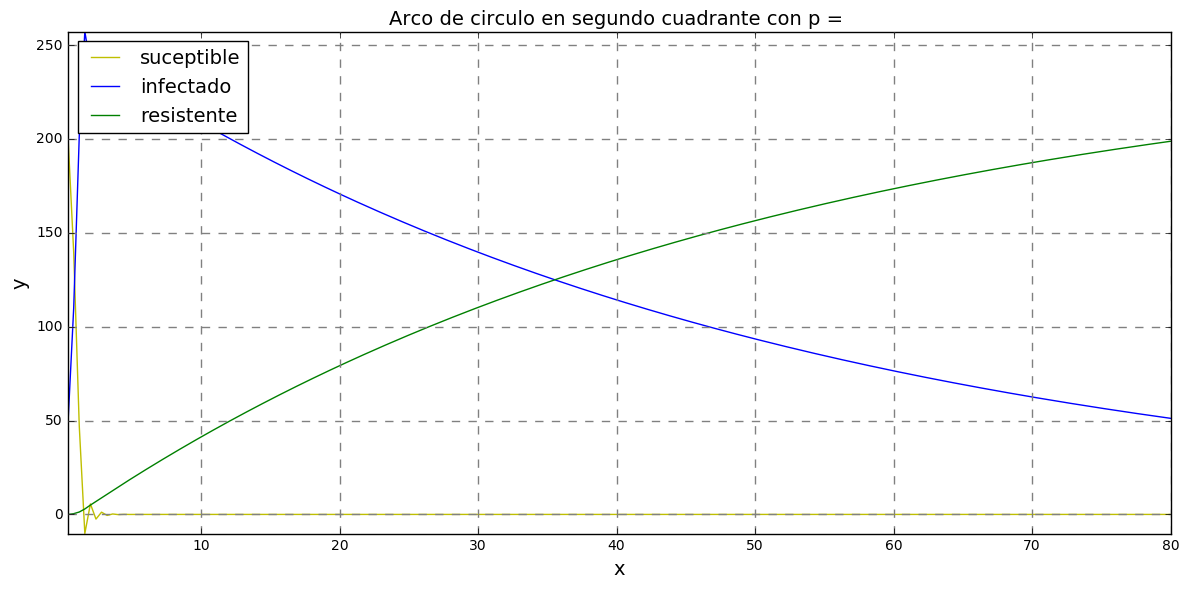

In [166]:
print(x1)
solve_buckling_ring_graphic_1(x1)